<font size="+5">#10. Principal Component Analysis (PCA)</font>

- Book + Private Lessons [Here ↗](https://sotastica.com/reservar)
- Subscribe to my [Blog ↗](https://blog.pythonassembly.com/)
- Let's keep in touch on [LinkedIn ↗](www.linkedin.com/in/jsulopz) 😄

# Load the Data

> - Simply execute the following lines of code to load the data.
> - This dataset contains **statistics about Car Accidents** (columns)
> - In each one of **USA States** (rows)

https://www.kaggle.com/fivethirtyeight/fivethirtyeight-bad-drivers-dataset/

In [1]:
import seaborn as sns

df = sns.load_dataset(name='car_crashes', index_col='abbrev')
df.sample(5)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
NC,16.8,6.552,5.208,15.792,13.608,708.24,127.82
UT,11.3,4.859,1.808,9.944,10.848,809.38,109.48
AL,18.8,7.332,5.640,18.048,15.040,784.55,145.08
OH,14.1,3.948,4.794,13.959,11.562,697.73,133.52
ID,15.3,5.508,4.437,13.005,14.994,641.96,82.75


# Data Preprocessing

- All variables need to be **comparables**.
- It is not the same to increase 1kg of weight, than 1m of height.
- We will use `StandardScaler()`.

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
scaler = StandardScaler()

In [6]:
import pandas as pd

In [9]:
dfnorm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
dfnorm.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
AL,0.737446,1.168148,0.439938,1.002301,0.277692,-0.580083,0.430514
AK,0.565936,1.212695,-0.211311,0.608532,0.807258,0.943258,-0.022900
AZ,0.688443,0.756709,0.187615,0.459357,1.033141,0.070876,-0.981778
AR,1.619498,-0.483614,0.547408,1.676052,1.951700,-0.337701,0.321125
CA,-0.928653,-0.399524,-0.891763,-0.594276,-0.891968,-0.048418,1.266178


In [10]:
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
AL,18.8,7.332,5.640,18.048,15.040,784.55,145.08
AK,18.1,7.421,4.525,16.290,17.014,1053.48,133.93
AZ,18.6,6.510,5.208,15.624,17.856,899.47,110.35
AR,22.4,4.032,5.824,21.056,21.280,827.34,142.39
CA,12.0,4.200,3.360,10.920,10.680,878.41,165.63


In [11]:
df.mean()

total              15.790196
speeding            4.998196
alcohol             4.886784
not_distracted     13.573176
no_previous        14.004882
ins_premium       886.957647
ins_losses        134.493137
dtype: float64

<AxesSubplot:>

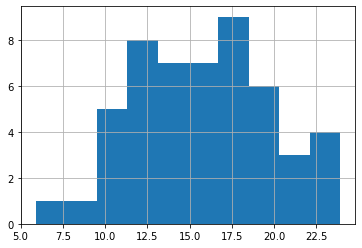

In [13]:
df.total.hist()

<AxesSubplot:>

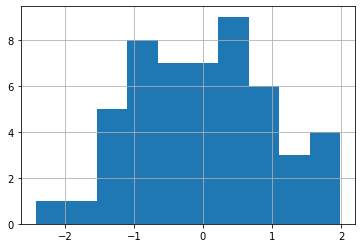

In [14]:
dfnorm.total.hist()

<AxesSubplot:>

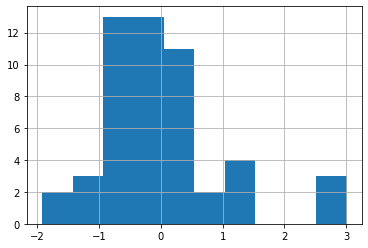

In [15]:
dfnorm.alcohol.hist()

# `KMeans()` Model in Python

## Code Thinking

> Which function computes the Model?
> - `fit()`
>
> How could can you **import the function in Python**?

In [16]:
from sklearn.cluster import KMeans

In [18]:
model = KMeans(n_clusters=4)

## Get the `cluster` for all USA States

> - `model.` + `↹`

In [20]:
model.fit(dfnorm)

KMeans(n_clusters=4)

> - Create a `dfsel` DataFrame
> - That contains the **columns you used for the model**

In [21]:
dfsel = df.copy()

> - Add a **new column**
> - That **contains the `cluster` prediction** for every USA State

In [22]:
dfsel['cluster'] = model.predict(X=dfnorm)

## Model Visualization

> - You may `hue=` the points with the `cluster` column

In [26]:
import plotly.express as px

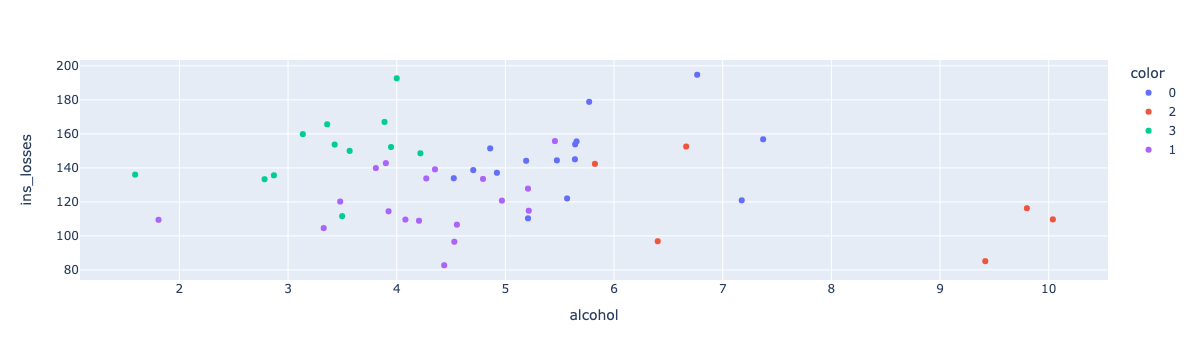

In [30]:
px.scatter(x='alcohol', y='ins_losses', data_frame=dfsel, color=dfsel.cluster.astype(str))

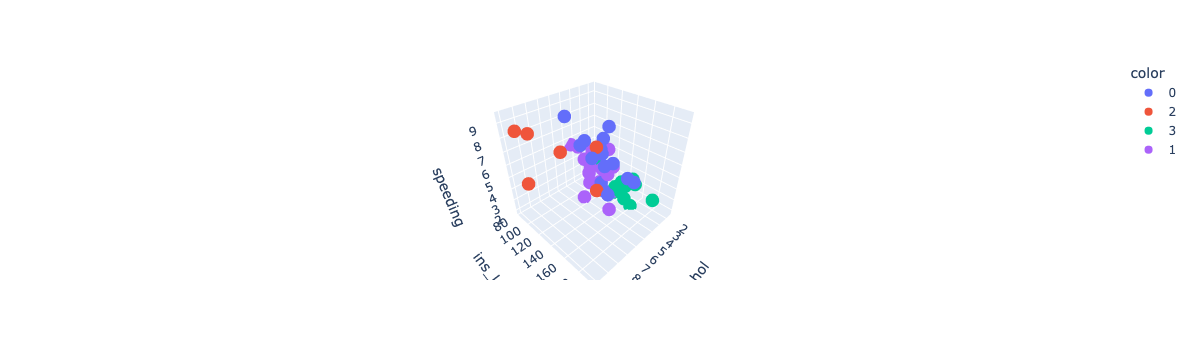

In [31]:
px.scatter_3d(x='alcohol', y='ins_losses', z='speeding', data_frame=dfsel, color=dfsel.cluster.astype(str))

https://blog.pythonassembly.com/python-tutorial-or-principal-component-analysis-made-simple

## Model Interpretation

> - Does the visualization makes sense?
> - The points are mixed between the groups, why?
> - We are **just representing 2 variables**
> - And the model was **fitted with 7 variables**

# Grouping Variables with `PCA()`

In [1]:
%%HTML

<iframe width="560" height="315" src="https://www.youtube.com/embed/HMOI_lkzW08" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## Transform Data to Components

> - `PCA()` is another technique used to transform data.
> How has the data been manipulated so far?
> 1. Original Data `df`
> 2. Normalized Data `dfnorm`
> 3. Principal Components Data `dfpca` (now)

## Visualize Components & Clusters

> - A **scatterplot** with `PC1` & `PC2`
> - Colour points by `cluster`
> - Are they **mixed** now?

## Relationship between Original Variables & Components

### Loading Vectors

### Calculating One PCA Value

### Biplot

# Other Techniques to Group Variables

> - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition